In [1]:
import matplotlib
from cycler import cycler
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, InsetPosition
import numpy as np
import h5py
from scipy.special import gamma
from scipy.interpolate import UnivariateSpline

from matplotlib import patheffects

matplotlib.style.use("custom-style.mplstyle")

## Figure 1

C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\627709610.py:203: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


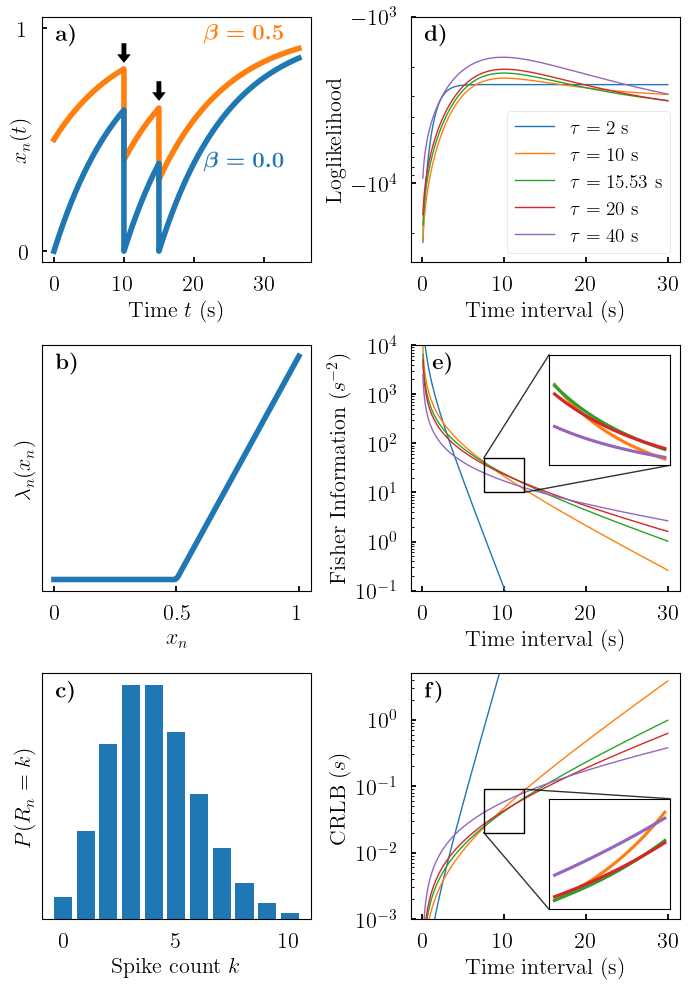

In [2]:
import matplotlib.patches


time_intervals = np.array([0.0, 10.0, 5.0, 20.0])

def dynamical_variable(t, beta, tau, x0):
    return 1.0 - np.exp(-t/tau)*(1.0 - beta*x0)

def rectified_linear(x, a, c):
    lam = a*x + c
    return 0.5*(np.abs(lam) + lam)

def poisson_dist(lam, k):
    return np.exp(-lam)*lam**(k)/gamma(k+1)

n = len(time_intervals)-1  # number of time intervals
res = 100  # temporal resolution
x1 = np.zeros(res*n)
x2 = np.zeros(res*n)
x0 = 1.0
x1[0] = x0
x2[0] = x0

beta1 = 0.0
beta2 = 0.5
tau1 = 10.0
tau2 = 10.0

full_trange = np.zeros(res*n)

for i in range(n):
    x10 = x1[i*res-1]
    x20 = x2[i*res-1]
    if (i == 0): x10 = x20 = x0
    T = time_intervals[i+1]
    trange = np.linspace(0.0, T, res)
    full_trange[i*res:(i+1)*res] = trange + np.sum(time_intervals[0:i+1])
    x1values = dynamical_variable(trange, beta1, tau1, x10)
    x2values = dynamical_variable(trange, beta2, tau2, x20)
    x1[i*res:(i+1)*res] = x1values
    x2[i*res:(i+1)*res] = x2values

fig, axes = plt.subplots(3, 2, figsize=(7, 10))

axes[0, 0].plot(full_trange, x1, lw=4.0, zorder=10)
axes[0, 0].plot(full_trange, x2, lw=4.0, ls="-")
axes[0, 0].set_ylim(-0.05, 1.05)
axes[0, 0].set_yticks([0.0, 1.0])
axes[0, 0].set_ylabel(r"$x_n(t)$", labelpad=-10)
axes[0, 0].set_xlabel(r"Time $t$ (s)")
axes[0, 0].set_xticks([0.0, 10.0, 20.0, 30.0])
txt = axes[0, 0].text(0.05, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left', 
                      color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[0, 0].arrow(10.0, 0.93, 0.0, -0.05, facecolor="Black", edgecolor="Black", width=0.6, zorder=2, head_length=0.035)
axes[0, 0].arrow(15.0, 0.76, 0.0, -0.05, facecolor="Black", edgecolor="Black", width=0.6, zorder=2, head_length=0.035)
axes[0, 0].text(0.6, 0.97, r"\boldmath$\beta = 0.5$", transform=axes[0, 0].transAxes, fontsize=16, va='top', ha='left', color="tab:orange", 
                path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[0, 0].text(0.6, 0.45, r"\boldmath$\beta = 0.0$", transform=axes[0, 0].transAxes, fontsize=16, va='top', ha='left', color="tab:blue",
                path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

xspace = np.linspace(0.0, 1.0, 100)
axes[1, 0].plot(xspace, rectified_linear(xspace, 10.0, -5.0), lw=4.0)
axes[1, 0].set_yticks([])
axes[1, 0].set_yticklabels([])
axes[1, 0].set_xticks([0.0, 0.5, 1.0])
axes[1, 0].set_xticklabels(["0", "0.5", "1"])
axes[1, 0].set_ylabel(r"$\lambda_n(x_n)$")
axes[1, 0].set_xlabel(r"$x_n$")
axes[1, 0].text(0.05, 0.97, r"\textbf{b)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

kspace = range(11)
barheights = [poisson_dist(4.0, k) for k in kspace]
axes[2, 0].bar(kspace, barheights)
axes[2, 0].set_xticks([0, 5, 10])
axes[2, 0].tick_params(axis="x", which="both", length=0)
axes[2, 0].set_yticks([])
axes[2, 0].set_yticklabels([])
axes[2, 0].set_ylabel(r"$P(R_n=k)$")
axes[2, 0].set_xlabel(r"Spike count $k$")
axes[2, 0].text(0.05, 0.97, r"\textbf{c)}", transform=axes[2, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

data = h5py.File("Data/model_loglikelihood.jld")

Trange = np.array(data["Trange"])
nll_values = np.array(data["nll"]).T
(n, res) = nll_values.shape
FI_values = np.array(data["FI"]).T
tau_sweep = np.array(data["tau_sweep"]).T

inset_ax2 = inset_axes(axes[1, 1],
                      width="45%",
                      height="45%",
                      loc="upper right")
inset_ax3 = inset_axes(axes[2, 1],
                      width="45%",
                      height="45%",
                      loc="lower right")


lw = 1.0
dx = 300
xind = (np.abs(Trange - 10.0).argmin())

labels = [r"$\tau = 2$ s", r"$\tau = 10$ s", r"$\tau = 15.53$ s", r"$\tau = 20$ s", r"$\tau = 40$ s"]

for i in range(n):
    avg_xn = dynamical_variable(Trange, 0.0, tau_sweep[i], 1.0)
    avg_lambda = rectified_linear(avg_xn, 10.0, 0.0)
    actual_xn = dynamical_variable(10.0, 0.0, tau_sweep[i], 1.0)
    actual_lambda = rectified_linear(actual_xn, 10.0, 0.0)
    avg_nll = -1000*(actual_lambda*np.log(avg_lambda) - avg_lambda - np.log(gamma(actual_lambda + 1.0)))
    y_spl = UnivariateSpline(Trange, nll_values[i, :], s=0, k=4)
    y_spl_2d = y_spl.derivative(n=2)
    lin,  = axes[0, 1].plot(Trange, -nll_values[i, :], lw=lw, label=labels[i])

    lin,  = axes[1, 1].plot(Trange, FI_values[i, :], lw=lw)

    lin,  = axes[2, 1].plot(Trange, 1/FI_values[i, :], lw=lw)
    
    rescaled_likelihood = -nll_values[i, xind-dx:xind+dx] - np.max(-nll_values[i, xind-dx:xind+dx])
    rescaled_likelihood = np.exp(rescaled_likelihood)

    ndx = dx//2
    inset_ax2.plot(Trange[xind-ndx:xind+ndx], FI_values[i, xind-ndx:xind+ndx])
    
    inset_ax3.plot(Trange[xind-ndx:xind+ndx], 1/FI_values[i, xind-ndx:xind+ndx])

inset_ax2.set_yticks([])
inset_ax2.set_yticklabels([])
inset_ax2.set_xticks([])
inset_ax2.set_xticklabels([])

inset_ax3.set_yticks([])
inset_ax3.set_yticklabels([])
inset_ax3.set_xticks([])
inset_ax3.set_xticklabels([])


inset_ax2.set_ylim(10**(1), 0.5*10**(2))
inset_ax3.set_ylim(2*10**(-2), 0.9*10**(-1))

axes[0, 1].set_yscale("symlog")
axes[0, 1].set_yticks([-10**3, -10**4])
axes[0, 1].set_yticks([-2*10**3, -3*10**3, -4*10**3, -5*10**3, -6*10**3, -7*10**3, -8*10**3, -9*10**3, -2*10**4, -3*10**4], minor=True)
axes[0, 1].set_xticks([0.0, 10.0, 20.0, 30.0])
axes[0, 1].set_ylabel(r"Loglikelihood")
axes[0, 1].set_xlabel(r"Time interval (s)")
axes[0, 1].text(0.05, 0.97, r"\textbf{d)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[0, 1].legend(loc="lower right")


# Zoom box 2
xlim_in = inset_ax2.get_xlim()
ylim_in = inset_ax2.get_ylim()

xlim = axes[1, 1].get_xlim()
ylim = axes[1, 1].get_ylim()


rect = matplotlib.patches.Rectangle((xlim_in[0], ylim_in[0]), xlim_in[1]-xlim_in[0], ylim_in[1]-ylim_in[0], edgecolor="black", ls="-", lw=1.0, fill=False, zorder=5)
l2 = matplotlib.patches.ConnectionPatch((xlim_in[0], ylim_in[1]), (xlim_in[0], ylim_in[1]), coordsA = axes[1, 1].transData, coordsB = inset_ax2.transData, color="black", zorder=5, lw=1.0, alpha=0.8)
l3 = matplotlib.patches.ConnectionPatch((xlim_in[1], ylim_in[0]), (xlim_in[1], ylim_in[0]), coordsA = axes[1, 1].transData, coordsB = inset_ax2.transData, color="black", zorder=5, lw=1.0, alpha=0.8)
axes[1, 1].add_patch(rect)
axes[1, 1].add_artist(l2)
axes[1, 1].add_artist(l3)

# Zoom box 3
xlim_in = inset_ax3.get_xlim()
ylim_in = inset_ax3.get_ylim()

xlim = axes[2, 1].get_xlim()
ylim = axes[2, 1].get_ylim()

rect = matplotlib.patches.Rectangle((xlim_in[0], ylim_in[0]), xlim_in[1]-xlim_in[0], ylim_in[1]-ylim_in[0], edgecolor="black", ls="-", lw=1.0, fill=False, zorder=5)
l1 = matplotlib.patches.ConnectionPatch((xlim_in[0], ylim_in[0]), (xlim_in[0], ylim_in[0]), coordsA = axes[2, 1].transData, coordsB = inset_ax3.transData, color="black", zorder=5, lw=1.0, alpha=0.8)
l4 = matplotlib.patches.ConnectionPatch((xlim_in[1], ylim_in[1]), (xlim_in[1], ylim_in[1]), coordsA = axes[2, 1].transData, coordsB = inset_ax3.transData, color="black", zorder=5, lw=1.0, alpha=0.8)
axes[2, 1].add_patch(rect)
axes[2, 1].add_artist(l1)
axes[2, 1].add_artist(l4)

axes[1, 1].set_yscale("log")
axes[1, 1].set_ylim(10**(-1), 10**4)
axes[1, 1].set_xticks([0.0, 10.0, 20.0, 30.0])
axes[1, 1].set_ylabel(r"Fisher Information $(s^{-2})$")
axes[1, 1].set_xlabel(r"Time interval (s)")
axes[1, 1].text(0.08, 0.97, r"\textbf{e)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[2, 1].set_xticks([0.0, 10.0, 20.0, 30.0])
axes[2, 1].set_yscale("log")
axes[2, 1].set_ylim(10**(-3), 0.5*10**1)
axes[2, 1].set_ylabel(r"CRLB $(s)$")
axes[2, 1].set_xlabel(r"Time interval (s)")
axes[2, 1].text(0.05, 0.97, r"\textbf{f)}", transform=axes[2, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])




plt.tight_layout()

## Figure 2

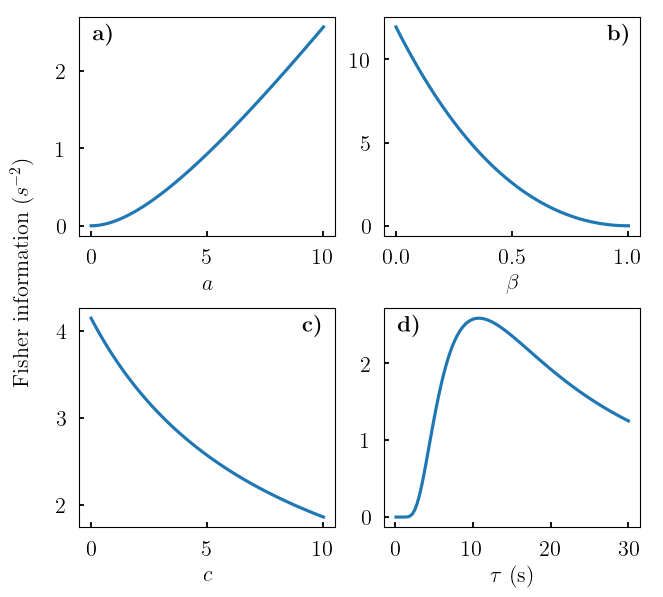

In [3]:
data = h5py.File("Data/FI_params.jld")

arange = np.array(data["arange"])
crange = np.array(data["crange"])
taurange = np.array(data["taurange"])
betarange = np.array(data["betarange"])
FI = np.array(data["FI"]).T
N = 1000  # number of cells
FI = N*FI

fig = plt.figure(figsize=(7, 6.4))
ax = fig.add_subplot(111)
axes = fig.subplots(2, 2)

axes[0, 0].plot(arange, FI[0, :])
axes[0, 0].set_xlabel(r"$a$")
axes[0, 0].text(0.05, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[0, 1].plot(betarange, FI[3, :])
axes[0, 1].set_xlabel(r"$\beta$")
axes[0, 1].text(0.87, 0.97, r"\textbf{b)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[1, 0].plot(crange, FI[1, :])
axes[1, 0].set_xlabel(r"$c$")
axes[1, 0].text(0.87, 0.97, r"\textbf{c)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
             color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


axes[1, 1].plot(taurange, FI[2, :])
axes[1, 1].set_xlabel(r"$\tau$ (s)")
axes[1, 1].set_xticks([0, 10, 20, 30])
axes[1, 1].text(0.05, 0.97, r"\textbf{d)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


ax.spines["top"].set_color("none")
ax.spines["bottom"].set_color("none")
ax.spines["right"].set_color("none")
ax.spines["left"].set_color("none")
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_ylabel(r"Fisher information $(s^{-2})$")

plt.tight_layout()

## Figure 3


C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\2896916294.py:16: RuntimeWarning: divide by zero encountered in divide
  axes[0, 0].plot(tau_range[starti:-1], 1/np.sqrt(FI[0, starti:-1]))
C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\2896916294.py:21: RuntimeWarning: divide by zero encountered in divide
  axes[1, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI[0, starti:-1]) + 0.5/np.sqrt(FI[1, starti:-1]))
C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\2896916294.py:26: RuntimeWarning: divide by zero encountered in divide
  axes[2, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI2[0, starti:-1]) + 0.5/np.sqrt(FI2[1, starti:-1]))


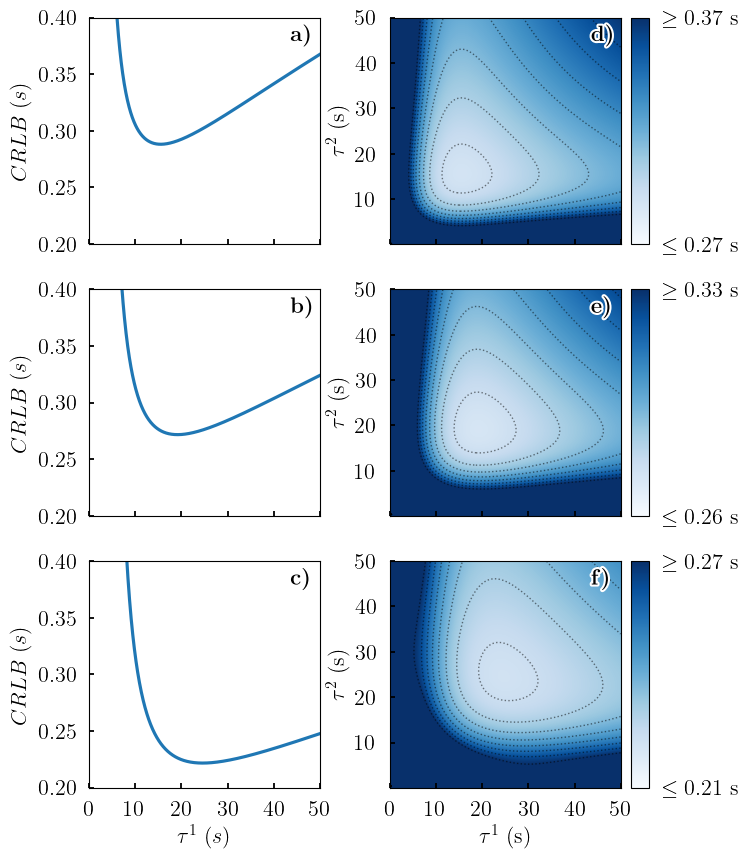

In [5]:
data = h5py.File("Data/four_discrete_cases.jld")
data2 = h5py.File("Data/four_discrete_cases_2.jld")

tau_range = np.array(data["tau_range"])
starti = 0
FI = 1000*np.array(data["FI"]).T

tau_range2 = np.array(data2["tau_range"])
FI2 = 1000*np.array(data2["FI"]).T

res = tau_range.size

fig = plt.figure(figsize=(7.0, 10.0))
axes = fig.subplots(3, 2, sharex=True, sharey="col")

axes[0, 0].plot(tau_range[starti:-1], 1/np.sqrt(FI[0, starti:-1]))
axes[0, 0].set_ylabel(r"$CRLB$ $(s)$")
axes[0, 0].text(0.87, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[1, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI[0, starti:-1]) + 0.5/np.sqrt(FI[1, starti:-1]))
axes[1, 0].set_ylabel(r"$CRLB$ $(s)$")
axes[1, 0].text(0.87, 0.97, r"\textbf{b)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[2, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI2[0, starti:-1]) + 0.5/np.sqrt(FI2[1, starti:-1]))
axes[2, 0].set_xlabel(r"$\tau^1$ $(s)$")
axes[2, 0].set_ylabel(r"$CRLB$ $(s)$")
axes[2, 0].text(0.87, 0.97, r"\textbf{c)}", transform=axes[2, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


RMSE12 = np.zeros((res, res))
RMSE22 = np.zeros((res, res))
RMSE122 = np.zeros((res, res))
RMSE222 = np.zeros((res, res))


for i in range(starti, res):
    for j in range(starti, res):
        if (np.sqrt(0.5*(FI[0, i] + FI[0, j])) != 0.0):
            RMSE12[i, j] = 1/np.sqrt(0.5*(FI[0, i] + FI[0, j]))
        if (np.sqrt(0.5*(FI2[0, i] + FI2[0, j])) != 0.0):
            RMSE122[i, j] = 1/np.sqrt(0.5*(FI2[0, i] + FI2[0, j]))
        if (np.sqrt(0.5*(FI[0, i] + FI[0, j])) != 0 and np.sqrt(0.5*(FI[1, i] + FI[1, j])) != 0):
            RMSE22[i, j] = 0.5/np.sqrt(0.5*(FI[0, i] + FI[0, j])) + 0.5/np.sqrt(0.5*(FI[1, i] + FI[1, j]))
        if (np.sqrt(0.5*(FI2[0, i] + FI2[0, j])) != 0 and np.sqrt(0.5*(FI2[1, i] + FI2[1, j])) != 0):
            RMSE222[i, j] = 0.5/np.sqrt(0.5*(FI2[0, i] + FI2[0, j])) + 0.5/np.sqrt(0.5*(FI2[1, i] + FI2[1, j]))

vmin = 0.2
vmax = 0.264



vmin, vmax = 0.27, 0.37
levels = np.linspace(vmin, vmax, 10)
im1 = axes[0, 1].imshow(RMSE12[starti:-1, starti:-1], origin="lower", 
                  extent=(tau_range[starti], tau_range[-1], tau_range[starti], tau_range[-1]),
                  vmin=vmin, vmax=vmax)
cont = axes[0, 1].contour(tau_range[starti:-1], tau_range[starti:-1],
                          RMSE12[starti:-1, starti:-1], colors="black",
                          linestyles=":", alpha=0.5, linewidths=1.0,
                          levels=levels)

axes[0, 1].set_ylabel(r"$\tau^2$ (s)")
axes[0, 1].text(0.87, 0.97, r"\textbf{d)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


vmin, vmax = 0.26, 0.33
levels = np.linspace(vmin, vmax, 10)
im2 = axes[1, 1].imshow(RMSE22[starti:-1, starti:-1], origin="lower",
                       extent=(tau_range[starti], tau_range[-1], tau_range[starti], tau_range[-1]),
                       vmin=vmin, vmax=vmax)
cont = axes[1, 1].contour(tau_range[starti:-1], tau_range[starti:-1],
                          RMSE22[starti:-1, starti:-1],colors="black",
                          linestyles=":", alpha=0.5, linewidths=1.0,
                          levels=levels)

axes[1, 1].set_ylabel(r"$\tau^2$ (s)")
axes[1, 1].text(0.87, 0.97, r"\textbf{e)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

vmin, vmax = 0.21, 0.27
levels = np.linspace(vmin, vmax, 10)
im3 = axes[2, 1].imshow(RMSE222[starti:-1, starti:-1], origin="lower",
                       extent=(tau_range[starti], tau_range[-1], tau_range[starti], tau_range[-1]),
                       vmin=vmin, vmax=vmax)
cont = axes[2, 1].contour(tau_range[starti:-1], tau_range[starti:-1],
                          RMSE222[starti:-1, starti:-1], colors="black",
                          linestyles=":", alpha=0.5, linewidths=1.0,
                          levels=levels)

axes[2, 1].set_xlabel(r"$\tau^1$ (s)")
axes[2, 1].set_ylabel(r"$\tau^2$ (s)")
axes[2, 1].text(0.87, 0.97, r"\textbf{f)}", transform=axes[2, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[0, 1].set_xticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0])
axes[1, 1].set_xticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0])
axes[0, 0].set_ylim(0.2, 0.4)

fig.subplots_adjust(right=0.885, wspace=0.3)

ax_bbox = axes[0, 1].get_position()
ax_bounds = ax_bbox.bounds
y0 = ax_bounds[1]
h = ax_bounds[3]
cbar_ax = fig.add_axes([0.9, y0, 0.025, h])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation="vertical")
cbar_ax.set_yticks([0.27, 0.37])
cbar_ax.set_yticklabels([r"$\leq 0.27$ s", r"$\geq 0.37$ s"])
cbar_ax.tick_params(axis="y", which="both", length=0)

ax_bbox = axes[1, 1].get_position()
ax_bounds = ax_bbox.bounds
y0 = ax_bounds[1]
h = ax_bounds[3]
cbar_ax = fig.add_axes([0.9, y0, 0.025, h])
cbar = fig.colorbar(im2, cax=cbar_ax, orientation="vertical")
cbar_ax.set_yticks([0.26, 0.33])
cbar_ax.set_yticklabels([r"$\leq 0.26$ s", r"$\geq 0.33$ s"])
cbar_ax.tick_params(axis="y", which="both", length=0)

ax_bbox = axes[2, 1].get_position()
ax_bounds = ax_bbox.bounds
y0 = ax_bounds[1]
h = ax_bounds[3]
cbar_ax = fig.add_axes([0.9, y0, 0.025, h])
cbar = fig.colorbar(im3, cax=cbar_ax, orientation="vertical")
cbar_ax.set_yticks([0.21, 0.27])
cbar_ax.set_yticklabels([r"$\leq 0.21$ s", r"$\geq 0.27$ s"])
cbar_ax.tick_params(axis="y", which="both", length=0)


## Figure S1

C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\628905723.py:20: RuntimeWarning: divide by zero encountered in divide
  axes[0, 0].plot(tau_range[starti:-1], 1/np.sqrt(FI[0, starti:-1]))
C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\628905723.py:25: RuntimeWarning: divide by zero encountered in divide
  axes[1, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI[0, starti:-1]) + 0.5/np.sqrt(FI[1, starti:-1]))
C:\Users\rlafo090\AppData\Local\Temp\ipykernel_25756\628905723.py:30: RuntimeWarning: divide by zero encountered in divide
  axes[2, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI2[0, starti:-1]) + 0.5/np.sqrt(FI2[1, starti:-1]))


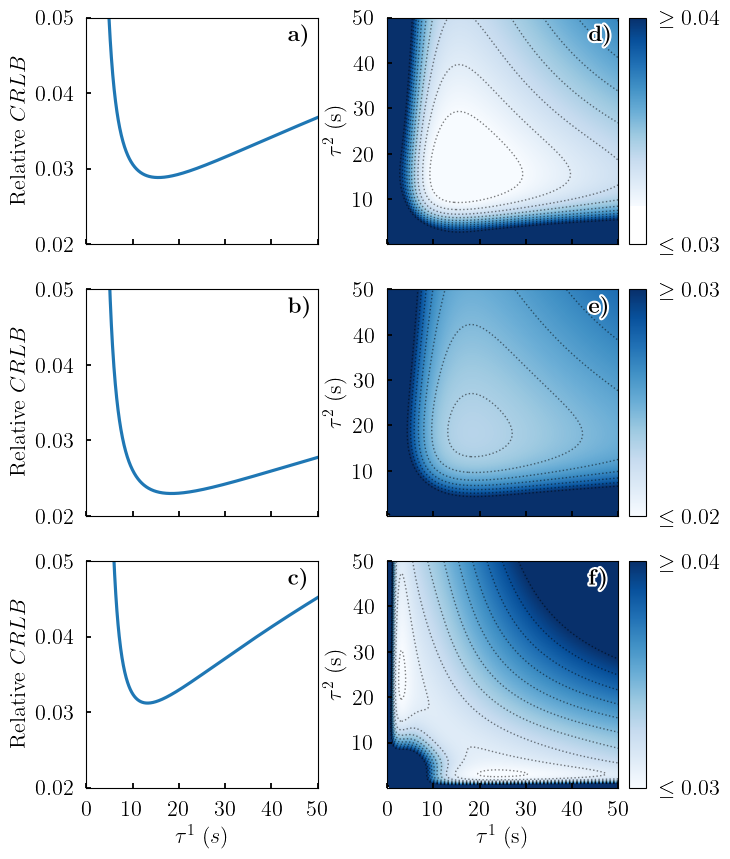

In [6]:
data = h5py.File("Data/six_discrete_cases.jld")
data2 = h5py.File("Data/six_discrete_cases_2.jld")

tau_range = np.array(data["tau_range"])
starti = 0
FI = 1000*np.array(data["FI"]).T
FI[0, :] *= 10.0**2
FI[1, :] *= 15.0**2

tau_range2 = np.array(data2["tau_range"])
FI2 = 1000*np.array(data2["FI"]).T
FI2[0, :] *= 2.0**2
FI2[1, :] *= 20.0**2

res = tau_range.size

fig = plt.figure(figsize=(7.0, 10.0))
axes = fig.subplots(3, 2, sharex=True, sharey="col")

axes[0, 0].plot(tau_range[starti:-1], 1/np.sqrt(FI[0, starti:-1]))
axes[0, 0].set_ylabel(r"Relative $CRLB$")
axes[0, 0].text(0.87, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[1, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI[0, starti:-1]) + 0.5/np.sqrt(FI[1, starti:-1]))
axes[1, 0].set_ylabel(r"Relative $CRLB$")
axes[1, 0].text(0.87, 0.97, r"\textbf{b)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[2, 0].plot(tau_range[starti:-1], 0.5/np.sqrt(FI2[0, starti:-1]) + 0.5/np.sqrt(FI2[1, starti:-1]))
axes[2, 0].set_xlabel(r"$\tau^1$ $(s)$")
axes[2, 0].set_ylabel(r"Relative $CRLB$")
axes[2, 0].text(0.87, 0.97, r"\textbf{c)}", transform=axes[2, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


RMSE12 = np.zeros((res, res))
RMSE22 = np.zeros((res, res))
RMSE122 = np.zeros((res, res))
RMSE222 = np.zeros((res, res))


for i in range(starti, res):
    for j in range(starti, res):
        if (np.sqrt(0.5*(FI[0, i] + FI[0, j])) != 0.0):
            RMSE12[i, j] = 1/np.sqrt(0.5*(FI[0, i] + FI[0, j]))
        if (np.sqrt(0.5*(FI2[0, i] + FI2[0, j])) != 0.0):
            RMSE122[i, j] = 1/np.sqrt(0.5*(FI2[0, i] + FI2[0, j]))
        if (np.sqrt(0.5*(FI[0, i] + FI[0, j])) != 0 and np.sqrt(0.5*(FI[1, i] + FI[1, j])) != 0):
            RMSE22[i, j] = 0.5/np.sqrt(0.5*(FI[0, i] + FI[0, j])) + 0.5/np.sqrt(0.5*(FI[1, i] + FI[1, j]))
        if (np.sqrt(0.5*(FI2[0, i] + FI2[0, j])) != 0 and np.sqrt(0.5*(FI2[1, i] + FI2[1, j])) != 0):
            RMSE222[i, j] = 0.5/np.sqrt(0.5*(FI2[0, i] + FI2[0, j])) + 0.5/np.sqrt(0.5*(FI2[1, i] + FI2[1, j]))

vmin = 0.2
vmax = 0.264



vmin, vmax = 0.03, 0.04
levels = np.linspace(vmin, vmax, 10)
im1 = axes[0, 1].imshow(RMSE12[starti:-1, starti:-1], origin="lower", 
                  extent=(tau_range[starti], tau_range[-1], tau_range[starti], tau_range[-1]),
                  vmin=vmin, vmax=vmax)
cont = axes[0, 1].contour(tau_range[starti:-1], tau_range[starti:-1],
                          RMSE12[starti:-1, starti:-1], colors="black",
                          linestyles=":", alpha=0.5, linewidths=1.0,
                          levels=levels)

axes[0, 1].set_ylabel(r"$\tau^2$ (s)")
axes[0, 1].text(0.87, 0.97, r"\textbf{d)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


vmin, vmax = 0.02, 0.03
levels = np.linspace(vmin, vmax, 10)
im2 = axes[1, 1].imshow(RMSE22[starti:-1, starti:-1], origin="lower",
                       extent=(tau_range[starti], tau_range[-1], tau_range[starti], tau_range[-1]),
                       vmin=vmin, vmax=vmax)

cont = axes[1, 1].contour(tau_range[starti:-1], tau_range[starti:-1],
                          RMSE22[starti:-1, starti:-1],colors="black",
                          linestyles=":", alpha=0.5, linewidths=1.0,
                          levels=levels)

axes[1, 1].set_ylabel(r"$\tau^2$ (s)")
axes[1, 1].text(0.87, 0.97, r"\textbf{e)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

vmin, vmax = 0.03, 0.04
levels = np.linspace(vmin, vmax, 10)
im3 = axes[2, 1].imshow(RMSE222[starti:-1, starti:-1], origin="lower",
                       extent=(tau_range[starti], tau_range[-1], tau_range[starti], tau_range[-1]),
                       vmin=vmin, vmax=vmax)

cont = axes[2, 1].contour(tau_range[starti:-1], tau_range[starti:-1],
                          RMSE222[starti:-1, starti:-1], colors="black",
                          linestyles=":", alpha=0.5, linewidths=1.0,
                          levels=levels)

axes[2, 1].set_xlabel(r"$\tau^1$ (s)")
axes[2, 1].set_ylabel(r"$\tau^2$ (s)")
axes[2, 1].text(0.87, 0.97, r"\textbf{f)}", transform=axes[2, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[0, 1].set_xticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0])
axes[1, 1].set_xticks([0.0, 10.0, 20.0, 30.0, 40.0, 50.0])
axes[0, 0].set_ylim(0.02, 0.05)

fig.subplots_adjust(right=0.885, wspace=0.3)

ax_bbox = axes[0, 1].get_position()
ax_bounds = ax_bbox.bounds
y0 = ax_bounds[1]
h = ax_bounds[3]
cbar_ax = fig.add_axes([0.9, y0, 0.025, h])
cbar = fig.colorbar(im1, cax=cbar_ax, orientation="vertical")
cbar_ax.set_yticks([0.028, 0.04])
cbar_ax.set_yticklabels([r"$\leq 0.03$", r"$\geq 0.04$"])
cbar_ax.tick_params(axis="y", which="both", length=0)

ax_bbox = axes[1, 1].get_position()
ax_bounds = ax_bbox.bounds
y0 = ax_bounds[1]
h = ax_bounds[3]
cbar_ax = fig.add_axes([0.9, y0, 0.025, h])
cbar = fig.colorbar(im2, cax=cbar_ax, orientation="vertical")
cbar_ax.set_yticks([0.02, 0.03])
cbar_ax.set_yticklabels([r"$\leq 0.02$", r"$\geq 0.03$"])
cbar_ax.tick_params(axis="y", which="both", length=0)

ax_bbox = axes[2, 1].get_position()
ax_bounds = ax_bbox.bounds
y0 = ax_bounds[1]
h = ax_bounds[3]
cbar_ax = fig.add_axes([0.9, y0, 0.025, h])
cbar = fig.colorbar(im3, cax=cbar_ax, orientation="vertical")
cbar_ax.set_yticks([0.03, 0.04])
cbar_ax.set_yticklabels([r"$\leq 0.03$", r"$\geq 0.04$"])
cbar_ax.tick_params(axis="y", which="both", length=0)


## Figure 4

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


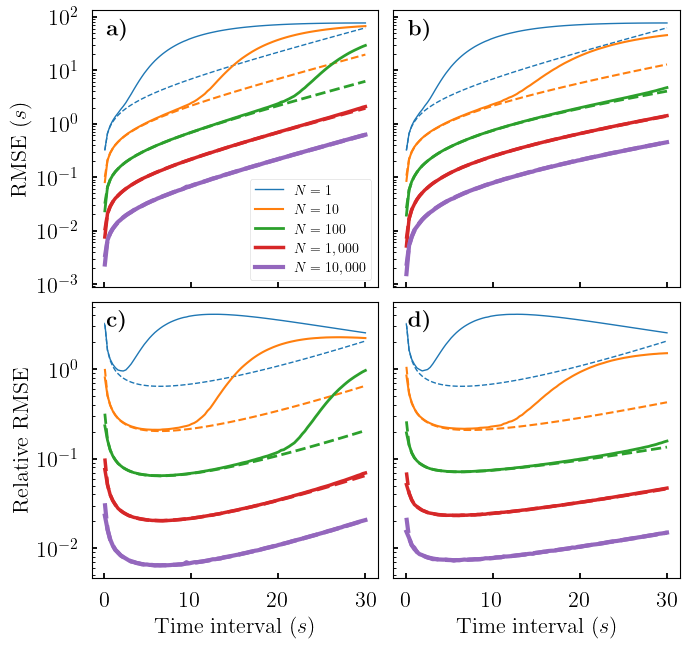

In [8]:
def lamb(t, a, c, tau, beta, x0=1.0):
    ret = a*(1.0 - np.exp(-t/tau)*(1.0 - beta*x0)) + c
    if (ret < 0.0): return 0.0 
    return ret

def fisher(t, a, c, tau, beta, x0=1.0):
    lam = lamb(t, a, c, tau, beta, x0)
    if (lam == 0.0): return 0.0
    if (tau == 0.0): return 0.0
    return (a + c - lam)**2/(tau**2*lam)


file_path_homogeneous = "Data/RMSE_FI_homogeneous.jld"
file_path_heterogeneous = "Data/RMSE_FI_heterogeneous.jld"

data_hom = h5py.File(file_path_homogeneous)
data_het = h5py.File(file_path_heterogeneous)

T_values = np.array(data_hom["T_values"]).T
N_values = np.array(data_hom["N_values"]).T
mean_results_hom = np.array(data_hom["mean_results"]).T
var_results_hom = np.array(data_hom["var_results"]).T
a_values_hom = np.array(data_hom["a_values"]).T
tau_values_hom = np.array(data_hom["tau_values"]).T

mean_results_het = np.array(data_het["mean_results"]).T
var_results_het = np.array(data_het["var_results"]).T
a_values_het = np.array(data_het["a_values"]).T
tau_values_het = np.array(data_het["tau_values"]).T

fig = plt.figure(figsize=(7, 6.6))

axes = fig.subplots(2, 2, sharex=True, sharey="row")

nN = N_values.size
nT = T_values.size

b_hom = np.zeros((nN, nT))
rmse_hom = np.zeros((nN, nT))
crlb_hom = np.zeros((nN, nT))

b_het = np.zeros((nN, nT))
rmse_het = np.zeros((nN, nT))
crlb_het = np.zeros((nN, nT))

beta = 0.0
c = 0.0

axes[0, 0].set_yscale("log")
axes[0, 1].set_yscale("log")
axes[1, 0].set_yscale("log")
axes[1, 1].set_yscale("log")


axes[0, 0].set_ylabel(r"RMSE $(s)$")
axes[1, 0].set_ylabel(r"Relative RMSE")
axes[1, 0].set_xlabel(r"Time interval $(s)$")
axes[1, 1].set_xlabel(r"Time interval $(s)$")

axes[0, 0].text(0.05, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[0, 1].text(0.05, 0.97, r"\textbf{b)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[1, 0].text(0.05, 0.97, r"\textbf{c)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[1, 1].text(0.05, 0.97, r"\textbf{d)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


for i in range(nN):
    b_hom[i, :] = T_values - mean_results_hom[i, :]
    rmse_hom[i, :] = np.sqrt( var_results_hom[i, :] + b_hom[i, :]**2 )
    crlb_hom[i, :] = [( np.sum( [fisher(T_values[j], a_values_hom[k], c, tau_values_hom[k], beta) for k in range(N_values[i])] ) )**(-0.5) for j in range(nT)]
    
    b_het[i, :] = T_values - mean_results_het[i, :]
    rmse_het[i, :] = np.sqrt( var_results_het[i, :] + b_het[i, :]**2 )
    crlb_het[i, :] = [( np.sum( [fisher(T_values[j], a_values_het[k], c, tau_values_het[k], beta) for k in range(N_values[i])] ) )**(-0.5) for j in range(nT)]

lw0 = 1.0
dlw = 0.5

labels = [r"$N = 1$", r"$N = 10$", r"$N = 100$", r"$N = 1,000$", r"$N = 10,000$"]

for i in range(nN):
    lin = axes[0, 0].plot(T_values, rmse_hom[i, :], label=labels[i], lw=lw0+i*dlw)
    axes[0, 0].plot(T_values, crlb_hom[i, :], ls="--", color=lin[0].get_color(), lw=lw0+i*dlw)
    lin = axes[0, 1].plot(T_values, rmse_het[i, :], label=labels[i], lw=lw0+i*dlw)
    axes[0, 1].plot(T_values, crlb_het[i, :], ls="--", color=lin[0].get_color(), lw=lw0+i*dlw)

    lin = axes[1, 0].plot(T_values, rmse_hom[i, :]/T_values, label=labels[i], lw=lw0+i*dlw)
    axes[1, 0].plot(T_values, crlb_hom[i, :]/T_values, ls="--", color=lin[0].get_color(), lw=lw0+i*dlw)
    lin = axes[1, 1].plot(T_values, rmse_het[i, :]/T_values, label=labels[i], lw=lw0+i*dlw)
    axes[1, 1].plot(T_values, crlb_het[i, :]/T_values, ls="--", color=lin[0].get_color(), lw=lw0+i*dlw)

axes[0, 0].legend(loc="lower right", prop={"size": 10})

plt.tight_layout()

## Figure 5

(0.0, 30.0)

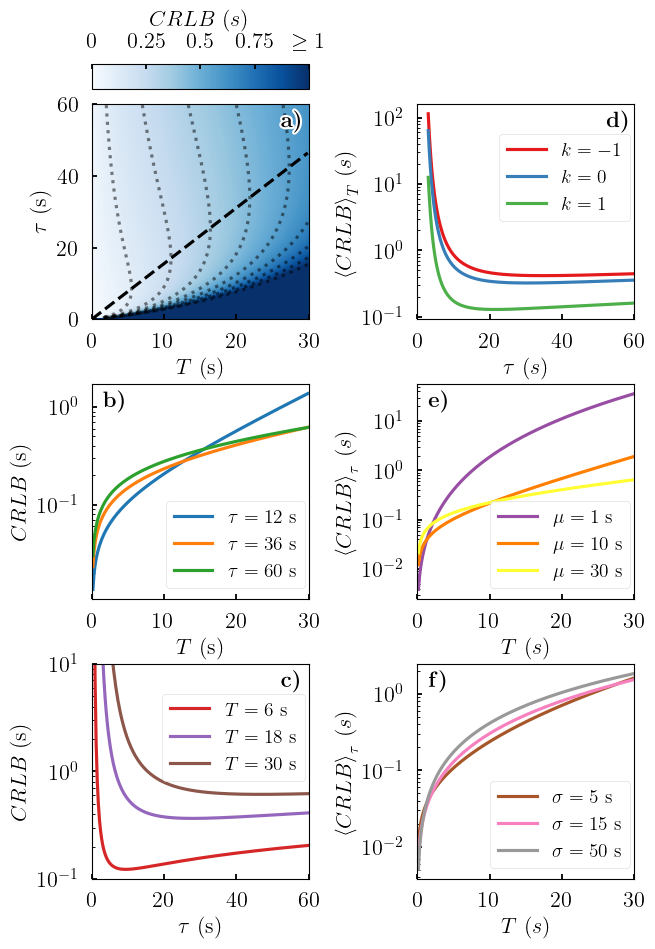

In [7]:
data = h5py.File("Data/RMSE_averages.jld")

fig, axes = plt.subplots(3, 2, figsize=(7.0, 10.0))

res = data["res"]
tau_space = np.array(data["tau_space"]).T
T_space = np.array(data["T_space"]).T
T_min = data["T_min"]
T_max = data["T_max"]
k_values = np.array(data["k_values"])
RMSE_dirac_values = np.array(data["RMSE_dirac_values"]).T
RMSE_avg_dirac_values = np.array(data["RMSE_avg_dirac_values"]).T
mu_values_mu = np.array(data["mu_values_mu"]).T
sigm_values_mu = np.array(data["sigm_values_mu"]).T
RMSE_total_values_mu = np.array(data["RMSE_total_values_mu"]).T
mu_values_sigm = np.array(data["mu_values_sigm"]).T
sigm_values_sigm = np.array(data["sigm_values_sigm"]).T
RMSE_total_values_sigm = np.array(data["RMSE_total_values_sigm"]).T

starti, endi = 0, len(T_space)-1
startj, endj = 0, len(tau_space)-1

Tindex = 100
tauindex = 50
N = 1000  # number of cells

wanted_T = [6.0, 18.0, 30.0]
wanted_tau = [12.0, 36.0, 60.0]
Tindices = []
tauindices = []
for T in wanted_T:
    Tindices.append((np.abs(T_space - T)).argmin())
for tau in wanted_tau:
    tauindices.append((np.abs(tau_space - tau)).argmin())

tau_minima_indices = np.argmin(RMSE_dirac_values, axis=1)

levels = np.linspace(0.001, 1.0, 10)
con = axes[0, 0].contour(T_space[starti:endi], tau_space[startj:endj],
                         RMSE_dirac_values[starti:endi, startj:endj].T/np.sqrt(N),
                         origin="lower", levels=levels,
                         colors="black", linestyles=":", alpha=0.5)

D = RMSE_dirac_values[starti:endi, startj:endj].T/np.sqrt(N)
D = np.where(D > 1.0, 1.0, D)
im = axes[0, 0].imshow(D,
                       origin="lower",
                       extent=(T_space[starti], T_space[endi], tau_space[startj], tau_space[endj]),
                       vmin=0.0, vmax=1.0)
axes[0, 0].plot(T_space[starti:endi], 1.5533*T_space[starti:endi], "k--")
axes[0, 0].text(0.87, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

fig.subplots_adjust(top=0.885, wspace=0.5, hspace=0.3)

ax_bbox = axes[0, 0].get_position()

ax_bounds = ax_bbox.bounds
x0 = ax_bounds[0]
w = ax_bounds[2]

cbar_ax = fig.add_axes([x0, 0.9, w, 0.025])

cbar = fig.colorbar(im, cax=cbar_ax, label=r"$CRLB$ $(s)$", orientation="horizontal")
cbar_ax.set_xticks([0.0, 0.25, 0.5, 0.75, 1.0])
cbar_ax.set_xticklabels([r"$0$", r"$0.25$", r"$0.5$", r"$0.75$", r"$\geq1$"])
cbar_ax.xaxis.set_ticks_position("top")
cbar_ax.xaxis.set_label_position("top")


axes[1, 0].set_prop_cycle(cycler("color", plt.cm.tab10.colors))
labels = [r"$\tau = 12$ s", r"$\tau = 36$ s", r"$\tau = 60$ s"]
for (i, j) in enumerate(tauindices):
    axes[1, 0].plot(T_space[starti:endi], RMSE_dirac_values[starti:endi, j]/np.sqrt(N), label=labels[i])
axes[1, 0].text(0.05, 0.97, r"\textbf{b)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[1, 0].legend(bbox_to_anchor=[1.025, 0.5], loc="upper right")

axes[2, 0].set_prop_cycle(cycler("color", plt.cm.tab10.colors[len(tauindices):]))
labels = [r"$T = 6$ s", r"$T = 18$ s", r"$T = 30$ s"]
for (j, i) in enumerate(Tindices):
    axes[2, 0].plot(tau_space[startj:endj], RMSE_dirac_values[i, startj:endj]/np.sqrt(N), label=labels[j])
axes[2, 0].text(0.87, 0.97, r"\textbf{c)}", transform=axes[2, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left', zorder=40,
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[2, 0].legend(bbox_to_anchor=[1.025, 0.905], loc="upper right")
startj, endj = 10, -1

axes[0, 1].set_prop_cycle(cycler("color", plt.cm.Set1.colors))
labels = [r"$k=-1$", r"$k=0$", r"$k=1$"]
for (i, k) in enumerate(k_values):
    axes[0, 1].plot(tau_space[startj:endj], RMSE_avg_dirac_values[startj:endj, i]/np.sqrt(N), label=labels[i])
axes[0, 1].text(0.87, 0.97, r"\textbf{d)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[0, 1].legend(bbox_to_anchor=[1.025, 0.905], loc="upper right")

axes[1, 1].set_prop_cycle(cycler("color", plt.cm.Set1.colors[len(k_values):]))
labels = [r"$\mu = 1$ s", r"$\mu = 10$ s", r"$\mu = 30$ s"]
for i in range(len(mu_values_mu)):
    axes[1, 1].plot(T_space, RMSE_total_values_mu[:, i]/np.sqrt(N), label=labels[i])
axes[1, 1].text(0.05, 0.97, r"\textbf{e)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[1, 1].legend(bbox_to_anchor=[1.025, 0.5], loc="upper right")

axes[2, 1].set_prop_cycle(cycler("color", plt.cm.Set1.colors[len(k_values)+len(mu_values_mu):]))
labels = [r"$\sigma = 5$ s", r"$\sigma = 15$ s", r"$\sigma = 50$ s"]
for i in range(len(mu_values_sigm)):
    axes[2, 1].plot(T_space, RMSE_total_values_sigm[:, i]/np.sqrt(N), label=labels[i])
axes[2, 1].text(0.05, 0.97, r"\textbf{f)}", transform=axes[2, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])
axes[2, 1].legend(bbox_to_anchor=[1.025, 0.5], loc="upper right")

axes[0, 0].set_xlabel(r"$T$ (s)")
axes[0, 0].set_ylabel(r"$\tau$ (s)")
axes[0, 0].set_xticks([0.0, 10.0, 20.0, 30.0])
axes[0, 0].set_yticks([0.0, 20.0, 40.0, 60.0])
axes[0, 0].set_xlim(0.0, 30.0)

axes[0, 1].set_xlabel(r"$\tau$ $(s)$")
axes[0, 1].set_ylabel(r"$\left<CRLB\right>_{T}$ $(s)$")
axes[0, 1].set_xticks([0.0, 20.0, 40.0, 60.0])
axes[0, 1].set_yscale("log")
axes[0, 1].set_xlim(0.0, 60.0)

axes[1, 0].set_xlabel(r"$T$ (s)")
axes[1, 0].set_ylabel(r"$CRLB$ (s)")
axes[1, 0].set_xticks([0, 10, 20, 30])
axes[1, 0].set_yscale("log")
axes[1, 0].set_xlim(0.0, 30.0)

axes[1, 1].set_xlabel(r"$T$ $(s)$")
axes[1, 1].set_ylabel(r"$\left<CRLB\right>_{\tau}$ $(s)$")
axes[1, 1].set_xticks([0.0, 10.0, 20.0, 30.0])
axes[1, 1].set_yscale("log")
axes[1, 1].set_xlim(0.0, 30.0)

axes[2, 0].set_xlabel(r"$\tau$ (s)")
axes[2, 0].set_ylabel(r"$CRLB$ (s)")
axes[2, 0].set_xticks([0, 20, 40, 60])
axes[2, 0].set_yscale("log")
axes[2, 0].set_ylim(10**(-1), 10**1)
axes[2, 0].set_xlim(0.0, 60.0)

axes[2, 1].set_xlabel(r"$T$ $(s)$")
axes[2, 1].set_ylabel(r"$\left<CRLB\right>_{\tau}$ $(s)$")
axes[2, 1].set_xticks([0.0, 10.0, 20.0, 30.0])
axes[2, 1].set_yscale("log")
axes[2, 1].set_xlim(0.0, 30.0)

## Figure 6

C:\Users\rlafo090\AppData\Local\Temp\ipykernel_14420\1623791343.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  return a*t**(-k)
C:\Users\rlafo090\AppData\Local\Temp\ipykernel_14420\1623791343.py:19: RuntimeWarning: divide by zero encountered in log
  return np.exp(-(np.log(x)-m)**2/(2*s2))/(x*np.sqrt(s2*2*np.pi))
C:\Users\rlafo090\AppData\Local\Temp\ipykernel_14420\1623791343.py:19: RuntimeWarning: invalid value encountered in divide
  return np.exp(-(np.log(x)-m)**2/(2*s2))/(x*np.sqrt(s2*2*np.pi))


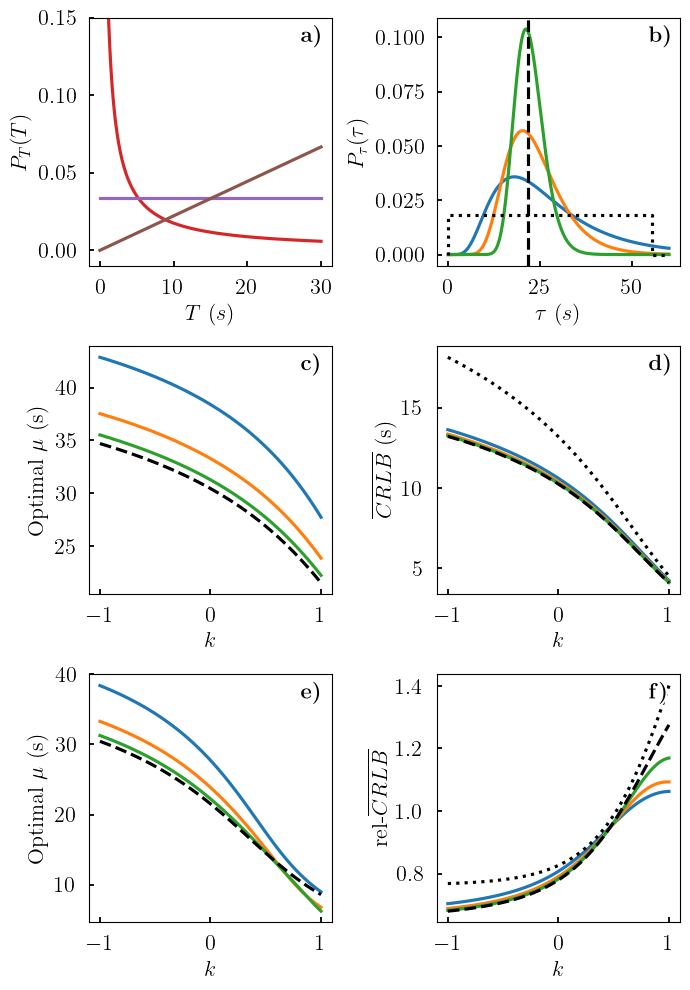

In [ ]:
file_path = "Data/power_law_sweep.jld"
file_pathrel = "Data/power_law_sweep_relative_rel.jld"

data = h5py.File(file_path)
datarel = h5py.File(file_pathrel)

fig, axes = plt.subplots(3, 2, figsize=(7.0, 10.0))


def prior_power(t, Tmin, Tmax, k):
    a = 1/np.log(Tmax/Tmin)
    if (k != 1):
        a = (1-k)/(Tmax**(1-k) - Tmin**(1-k))
    return a*t**(-k)

def lognormal(x, mu, sigm):
    m = np.log(mu**2/np.sqrt(mu**2 + sigm**2))
    s2 = np.log(1 + sigm**2/mu**2)
    return np.exp(-(np.log(x)-m)**2/(2*s2))/(x*np.sqrt(s2*2*np.pi))

res = 400

tau_space = np.linspace(0.0, 60.0, res)
T_space = np.linspace(0.0, 30.0, res)

k_values = [1, 0.0, -1.0]
T_prior = np.zeros((len(k_values), res))

mean_tau = np.array(data["mean_tau"]).T
mu_values = mean_tau[:-1, mean_tau.shape[1]-1]
sigm_values = np.array(data["sigm_values"]).T
tau_prior = np.zeros((len(mu_values), res))

Tmin, Tmax = 0.1, 30.0

klabels = [r"$k=-2$", r"$k=0$", r"$k=1/4$"]

axes[0, 0].set_prop_cycle(cycler("color", plt.cm.tab10.colors[3:]))
for (i, k) in enumerate(k_values):
    T_prior[i, :] = prior_power(T_space, Tmin, Tmax, k)
    axes[0, 0].plot(T_space, T_prior[i, :], label=klabels[i])

for i in range(len(sigm_values)-1, -1, -1):
    tau_prior[i, :] = lognormal(tau_space, mu_values[i], sigm_values[i])
    axes[0, 1].plot(tau_space, tau_prior[i, :])
    
tau_min = 0.1
tau_max = np.sqrt(12)*np.max(sigm_values) + tau_min
h = 1/(tau_max - tau_min)
axes[0, 1].plot([0.0, tau_min, tau_min, tau_max, tau_max, tau_space[-1]], [0.0, 0.0, h, h, 0.0, 0.0], "k:")

ylim = axes[0, 1].get_ylim()
axes[0, 1].plot([mean_tau[-2, mean_tau.shape[1]-2], mean_tau[-2, mean_tau.shape[1]-2]], ylim, "k--")
axes[0, 1].set_ylim(ylim)

axes[0, 0].set_ylabel(r"$P_T(T)$")
axes[0, 0].set_xlabel(r"$T$ $(s)$")
axes[0, 0].set_xticks([0, 10, 20, 30])
axes[0, 0].set_ylim(-0.01, 0.15)
axes[0, 0].text(0.87, 0.97, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[0, 1].set_ylabel(r"$P_\tau(\tau)$")
axes[0, 1].set_xlabel(r"$\tau$ $(s)$")
axes[0, 1].text(0.87, 0.97, r"\textbf{b)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

k_values = np.array(data["k_values"]).T
xi_values = np.array(data["xi_values"]).T

for i in range(len(sigm_values)-1, -1, -1):
    mu_values = np.log(mean_tau[i, :]**2/np.sqrt(mean_tau[i, :]**2 + sigm_values[i]**2))
    sigma2 = np.log(1 + sigm_values[i]**2/mean_tau[i, :]**2)
    p = np.exp(mu_values - sigma2)
    med = np.exp(mu_values)
    axes[1, 0].plot(k_values, mean_tau[i, :], label=r"$\sigma = "+str(sigm_values[i])+r"$ $s$")
    axes[1, 1].plot(k_values, xi_values[i, :], label=r"$\sigma = "+str(sigm_values[i])+r"$ $s$")


axes[1, 0].plot(k_values, mean_tau[-2, :], "k--", label=r"$\sigma = 0$ $s$")
axes[1, 1].plot(k_values, xi_values[-2, :], "k--", label=r"$\sigma = 0$ $s$")
axes[1, 1].plot(k_values, xi_values[-1, :], "k:", label=r"Uniform")
axes[1, 0].text(0.87, 0.97, r"\textbf{c)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[1, 0].set_ylabel(r"Optimal $\mu$ (s)")
axes[1, 1].set_ylabel(r"$\overline{CRLB}$ (s)")
axes[1, 0].set_xlabel(r"$k$")
axes[1, 1].set_xlabel(r"$k$")
axes[1, 1].text(0.87, 0.97, r"\textbf{d)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

k_values = np.array(datarel["k_values"]).T
xi_values = np.array(datarel["xi_values"]).T
mean_tau = np.array(datarel["mean_tau"]).T

for i in range(len(sigm_values)-1, -1, -1):
    mu_values = np.log(mean_tau[i, :]**2/np.sqrt(mean_tau[i, :]**2 + sigm_values[i]**2))
    sigma2 = np.log(1 + sigm_values[i]**2/mean_tau[i, :]**2)
    p = np.exp(mu_values - sigma2)
    med = np.exp(mu_values)
    axes[2, 0].plot(k_values, mean_tau[i, :], label=r"$\sigma = "+str(sigm_values[i])+r"$ $s$")
    axes[2, 1].plot(k_values, xi_values[i, :], label=r"$\sigma = "+str(sigm_values[i])+r"$ $s$")


axes[2, 0].plot(k_values, mean_tau[-1, :], "k--", label=r"$\sigma = 0$ $s$")
axes[2, 1].plot(k_values, xi_values[-1, :], "k--", label=r"$\sigma = 0$ $s$")
axes[2, 1].plot(k_values, xi_values[-2, :], "k:", label=r"Uniform")

axes[2, 0].text(0.87, 0.97, r"\textbf{e)}", transform=axes[2, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])

axes[2, 0].set_ylabel(r"Optimal $\mu$ (s)")
axes[2, 1].set_ylabel(r"rel-$\overline{CRLB}$")
axes[2, 0].set_xlabel(r"$k$")
axes[2, 1].set_xlabel(r"$k$")
axes[2, 1].text(0.87, 0.97, r"\textbf{f)}", transform=axes[2, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left',
                color='black', path_effects=[patheffects.withStroke(linewidth=3,foreground="white")])


plt.tight_layout()

## Figure 7

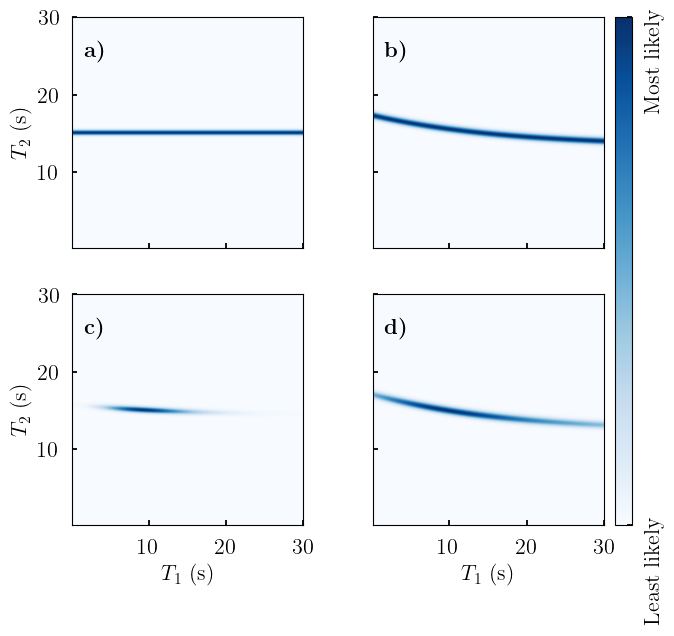

In [27]:
filepath = "Data/data_example_llikelihood_20230828144539582.jld"
data = h5py.File(filepath, "r")


llikelihood = np.asarray(data["llikelihood"])
T = np.asarray(data["T"])
Tmin = np.asarray(data["Tmin"])
Tmax = np.asarray(data["Tmax"])

fig, axes = plt.subplots(2, 2, figsize=(7.0, 6.6), sharex=True, sharey=True)

axes[0, 0].imshow(np.exp((llikelihood[:, :, 0]) - np.max(llikelihood[:, :, 0])), origin="lower", extent=(Tmin, Tmax, Tmin, Tmax))
axes[0, 0].text(0.05, 0.9, r"\textbf{a)}", transform=axes[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left', color='black')
axes[0, 1].imshow(np.exp((llikelihood[:, :, 1]) - np.max(llikelihood[:, :, 1])), origin="lower", extent=(Tmin, Tmax, Tmin, Tmax))
axes[0, 1].text(0.05, 0.9, r"\textbf{b)}", transform=axes[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left', color='black')
axes[1, 0].imshow(np.exp((llikelihood[:, :, 2]) - np.max(llikelihood[:, :, 2])), origin="lower", extent=(Tmin, Tmax, Tmin, Tmax))
axes[1, 0].text(0.05, 0.9, r"\textbf{c)}", transform=axes[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='left', color='black')
im = axes[1, 1].imshow(np.exp((llikelihood[:, :, 3]) - np.max(llikelihood[:, :, 3])), origin="lower", extent=(Tmin, Tmax, Tmin, Tmax))
axes[1, 1].text(0.05, 0.9, r"\textbf{d)}", transform=axes[1, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='left', color='black')

axes[0, 0].set_ylabel(r"$T_2$ (s)")
axes[1, 0].set_ylabel(r"$T_2$ (s)")
axes[1, 0].set_xlabel(r"$T_1$ (s)")
axes[1, 1].set_xlabel(r"$T_1$ (s)")

fig.subplots_adjust(right=0.885, wspace=0.3)

ax_bbox1 = axes[0, 1].get_position()
ax_bounds1 = ax_bbox1.bounds
ax_bbox2 = axes[1, 1].get_position()
ax_bounds2 = ax_bbox2.bounds

y0 = ax_bounds2[1]
y1 = ax_bounds1[1] + ax_bounds1[3]
h = y1 - y0


cbar_ax = fig.add_axes([0.9, y0, 0.025, h])

cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_ticks([0, 1])
cbar.set_ticklabels(["Least likely", "Most likely"], rotation=90)
cbar_ax.xaxis.set_ticks_position("top")
cbar_ax.xaxis.set_label_position("top")